<a href="https://colab.research.google.com/github/BISH0808/Algorithms/blob/main/Notes_from_UlbiTV_video/Algoritm_Dijkstri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritm Dijkstri ( Алгоритм Дейкстры)

# Суть

Алгоритм дейкстры для поиска кратчайшего пути

Цель: найти кратчайший путь, перемещаясь по вершинам графа. В алгоритме не важно длительынй этот путь или нет, важно количество пройденных участков. В алгоритм дейкстры учитывается длина пройденного ребра, так называемый вес. На рисунке ниже можно заметить, что путь A-B-F-G - самый быстрый, так как промежуток BF имеет вес 7. 

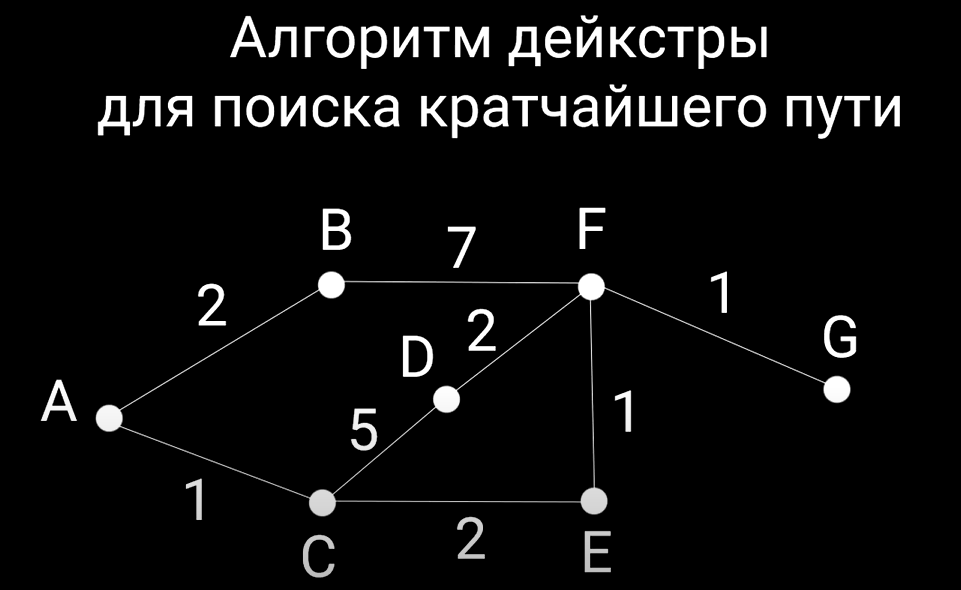

Суть работы алгоритма заключается в следующем: за стартовую точку принимаем А, за конечную G. Составляем табличку: записываем те вершины, в которые мы можем попасть из стартовой точки, все остальные вершины являются недостижимыми и мы помечаем их знаком бесконечность.

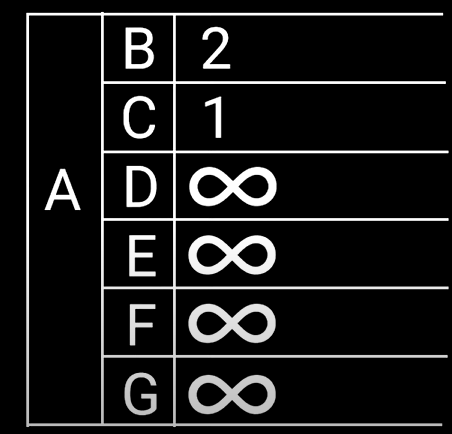

На втором этапе мы помечаем эти вершины, как рассмотренные.

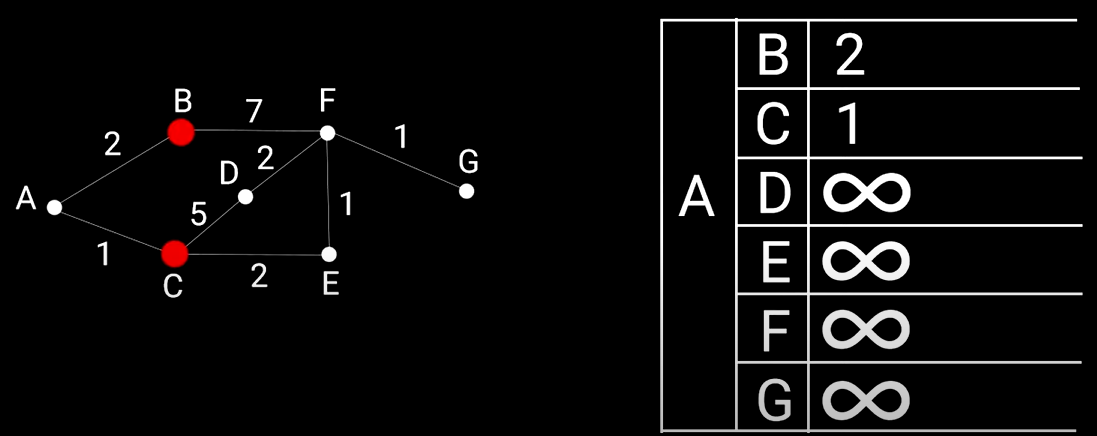

На третьем этапе мы рассматриваем вершины, в которые мы можем попсать из точек B и С. И в таблицу записываем значения от точки А до точек, которые мы достигаем из вершин B и С.

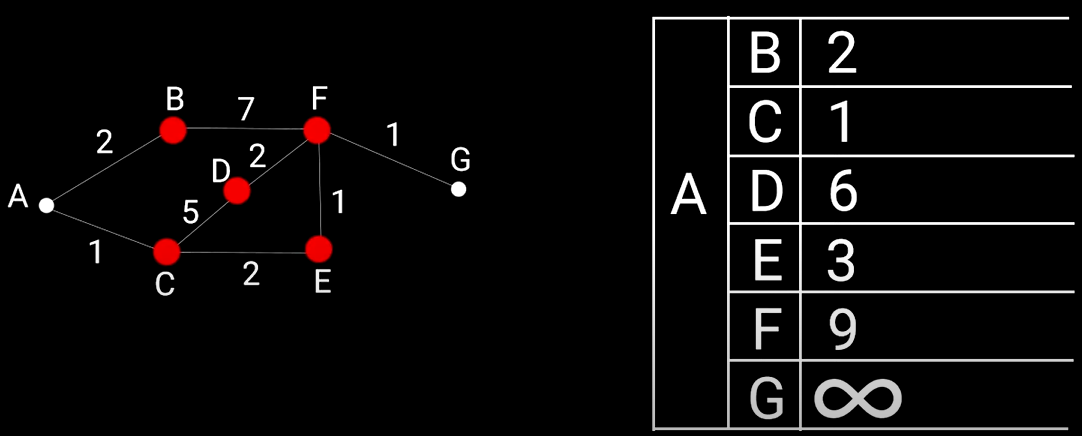

НА следующем этапе помеаем эти точки как уже рассмотренные. Просиходит перерасчет. Мы находим путь до точки F, который оказывается короче и перезаписываем значение в таблице.

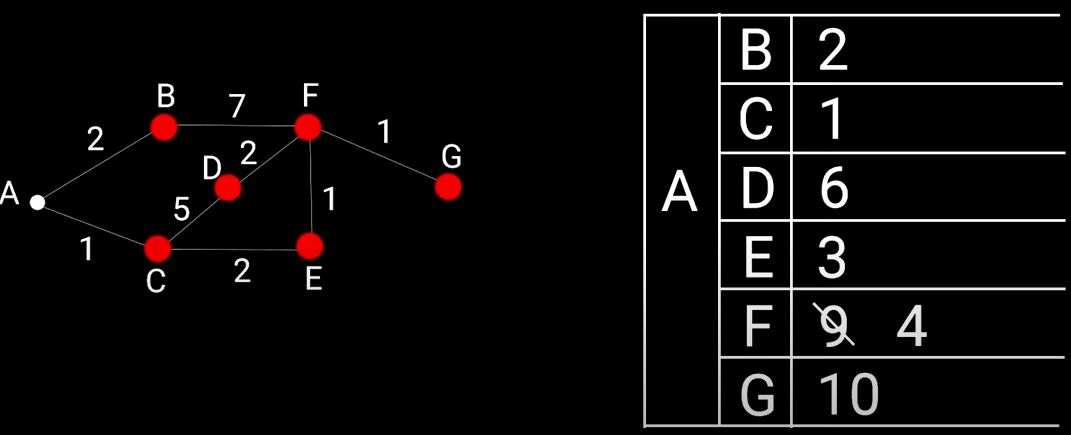

На следующем этапе мы проделаем все тоже самое и находим самый оптимальный путь.

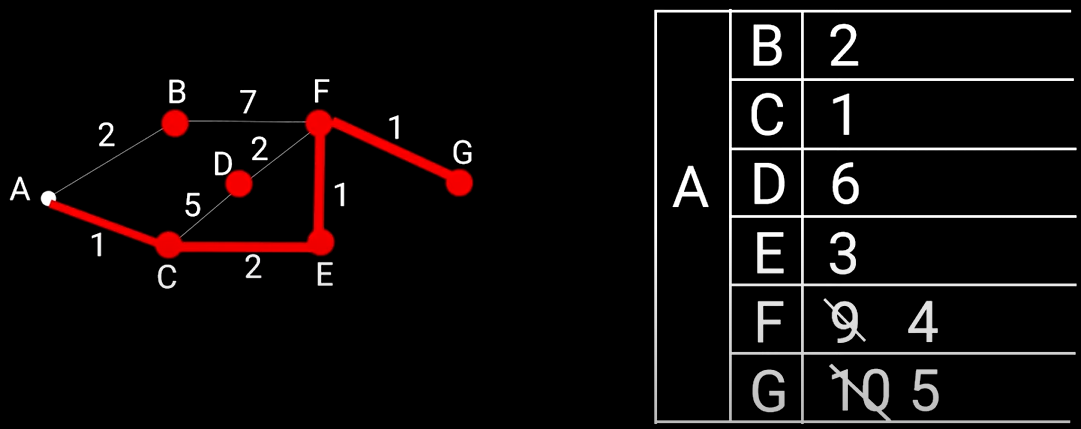

В конце мы узнаем, что из точки A в точку G мы можем добраться за 5 условных единиц.

# Код

In [ ]:
// Поиск кратчайшего пути в графе

const graph = {}
graph.a = {b: 2, c: 1}
graph.b = {f: 7}
graph.c = {d: 5, e: 2}
graph.d = {f: 2}
graph.e = {f: 1}
graph.f = {g: 1}
graph.g = {}

function shortPath(graph, start, end){
    //объект, в котором храним кратчайшие пути
    const costs = {}
    //массив, в который будем добавлять те узлы, которые мы уже проверили
    const processed = []
    //объект, в котором мы будем хранить соседние вершины рассматриваемого узла
    let neighbors = {}
    //Составляем табличку: записываем те вершины, в которые мы можем попасть из стартовой точки,
    // все остальные вершины являются недостижимыми и мы помечаем их знаком бесконечность.
    Object.keys(graph).forEach(node =>{
        if (node !==start){
            let value = graph[start][node]
            costs[node] = value || 100000000
        }
    })
    let node = findNodeLowestCost(costs, processed)
    while (node){
        const cost = costs[node]
        neighbors = graph[node]
        Object.keys(neighbors).forEach(neighbor => {
            let newCost = cost + neighbors[neighbor]
            if (newCost < costs[neighbor]){
                costs[neighbor] = newCost
            }
        })
        processed.push(node)
        node = findNodeLowestCost(costs, processed)
    }
    return costs
}


function findNodeLowestCost(costs, processed){
    let lowestCost = 100000000
    let lowestNode;
    Object.keys(costs).forEach(node => {
        let cost = costs[node]
        if (cost < lowestCost && !processed.includes(node)){
            lowestCost = cost
            lowestNode = node 
        }
    })
    return lowestNode
}
console.log(shortPath(graph, 'a', 'g'));

**Ответ:**

{ b: 2, c: 1, d: 6, e: 3, f: 4, g: 5 }